In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import shap


In [2]:
# Load dataset
file_path = '/Users/avi/Desktop/Projects/Salary Data.csv'
df = pd.read_csv(file_path)

# Display initial data
print(df.head())
print(df.info())
print(df.describe())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary

In [3]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Confirm missing values handled
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

# Assuming the dataset has 'Years of Experience' and 'Salary'
X = df[['Years of Experience']]  # Add more features as needed
y = df['Salary']



Missing Values:
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

Missing Values After Cleaning:
 Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [5]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Linear Regression Model
linear_model = LinearRegression()

# Cross-validation for Linear Regression
cv_scores = cross_val_score(linear_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression Cross-Validation MSE:", -cv_scores.mean())


Linear Regression Cross-Validation MSE: 348807361.27822286


In [8]:

# Calculate RMSE manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Evaluate Model
print("\nLinear Regression Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))



Linear Regression Model Evaluation:
MAE: 12094.17034119476
RMSE: 15551.041248094447
R2 Score: 0.8991338517367767


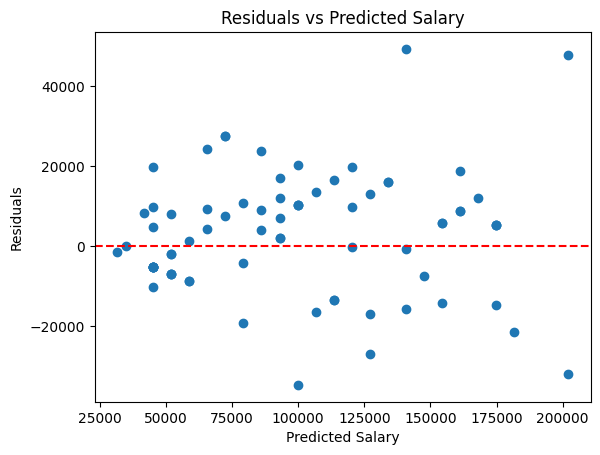

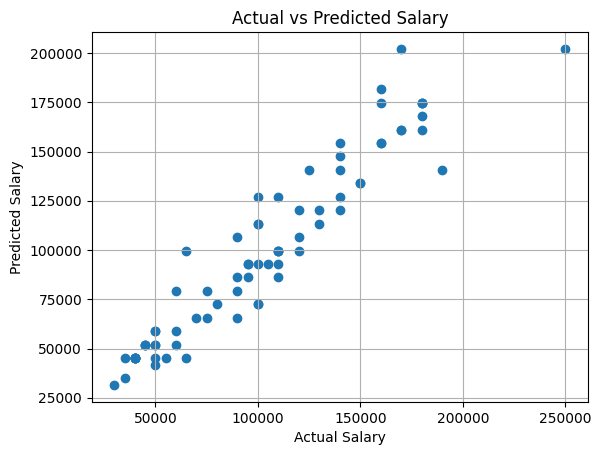

In [9]:
# Residuals Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Salary")
plt.show()

# Scatter plot for Actual vs Predicted Salary
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()


In [10]:
# Ridge Regression Model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("\nRidge Regression Model Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred_ridge))

# Lasso Regression Model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Regression Model Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred_lasso))

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Model Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred_rf))

# Feature Importance from Random Forest
feature_importances = rf_model.feature_importances_
print("\nFeature Importance from Random Forest:", feature_importances)



Ridge Regression Model Evaluation:
R2 Score: 0.8990349276729848

Lasso Regression Model Evaluation:
R2 Score: 0.8991332564358061

Random Forest Model Evaluation:
R2 Score: 0.9008436730759666

Feature Importance from Random Forest: [1.]


In [12]:
from sklearn.model_selection import GridSearchCV

# Set parameters for Random Forest tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for Random Forest:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("R2 Score for Best Random Forest Model:", r2_score(y_test, y_pred_best_rf))


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
R2 Score for Best Random Forest Model: 0.9019268890085018


In [13]:
# Save the best model (Random Forest or Linear Regression) for future use
joblib.dump(best_rf_model, 'salary_predictor_model.pkl')  # Or you can save linear_model or ridge_model


['salary_predictor_model.pkl']

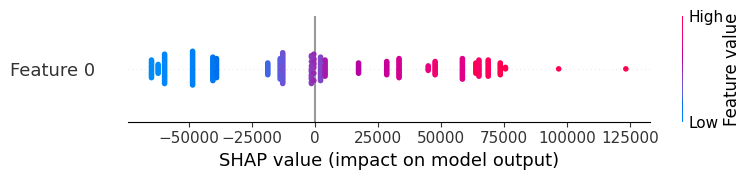

In [14]:
# SHAP for model interpretability
explainer = shap.TreeExplainer(rf_model)  # Use Random Forest or any other tree model
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train)


# TEST

In [15]:

model = rf_model  # Or use `best_rf_model` if GridSearchCV was used

# Sample input data (Years of Experience)
sample_data = pd.DataFrame({
    'Years of Experience': [1.5, 5, 7.2, 10, 15]
})

# Scale the input (same scaler used during training)
sample_scaled = scaler.transform(sample_data)

# Predict salaries
predicted_salaries = model.predict(sample_scaled)

# Show predictions
for exp, sal in zip(sample_data['Years of Experience'], predicted_salaries):
    print(f"Years of Experience: {exp} --> Predicted Salary: ${sal:,.2f}")


Years of Experience: 1.5 --> Predicted Salary: $35,274.09
Years of Experience: 5.0 --> Predicted Salary: $61,030.64
Years of Experience: 7.2 --> Predicted Salary: $86,278.26
Years of Experience: 10.0 --> Predicted Salary: $98,632.76
Years of Experience: 15.0 --> Predicted Salary: $133,345.51


In [17]:
# For user input from terminal (if running as a script)
years = float(input("Enter years of experience: "))
input_scaled = scaler.transform([[years]])
predicted_salary = model.predict(input_scaled)[0]
print(f"Predicted Salary for {years} years of experience is: ${predicted_salary:,.2f}")


Enter years of experience: 3.5
Predicted Salary for 3.5 years of experience is: $51,558.58


/Users/avi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Step-by-Step Code (Job Title + Years of Experience)


In [18]:
# Encode Job Titles using LabelEncoder
label_encoder = LabelEncoder()
df['Job Title Encoded'] = label_encoder.fit_transform(df['Job Title'])

# Store original mapping for later use
job_title_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


In [19]:
# Define features and target
X = df[['Years of Experience', 'Job Title Encoded']]
y = df['Salary']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a model (e.g., Random Forest)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
# Show available job titles
print("Available Job Titles:")
job_titles = list(job_title_mapping.keys())
for i, title in enumerate(job_titles):
    print(f"{i+1}. {title}")

# Let user pick a job title
job_choice = int(input("Select a job title (enter the number): ")) - 1
selected_title = job_titles[job_choice]
encoded_title = job_title_mapping[selected_title]

# Let user input years of experience
years = float(input("Enter years of experience: "))

# Prepare input for model
input_df = pd.DataFrame([[years, encoded_title]], columns=['Years of Experience', 'Job Title Encoded'])
input_scaled = scaler.transform(input_df)

# Predict salary
predicted_salary = model.predict(input_scaled)[0]
print(f"\n🧾 Predicted Salary for '{selected_title}' with {years} years of experience is: ${predicted_salary:,.2f}")


Available Job Titles:
1. Account Manager
2. Accountant
3. Administrative Assistant
4. Business Analyst
5. Business Development Manager
6. Business Intelligence Analyst
7. CEO
8. Chief Data Officer
9. Chief Technology Officer
10. Content Marketing Manager
11. Copywriter
12. Creative Director
13. Customer Service Manager
14. Customer Service Rep
15. Customer Service Representative
16. Customer Success Manager
17. Customer Success Rep
18. Data Analyst
19. Data Entry Clerk
20. Data Scientist
21. Digital Content Producer
22. Digital Marketing Manager
23. Director
24. Director of Business Development
25. Director of Engineering
26. Director of Finance
27. Director of HR
28. Director of Human Capital
29. Director of Human Resources
30. Director of Marketing
31. Director of Operations
32. Director of Product Management
33. Director of Sales
34. Director of Sales and Marketing
35. Event Coordinator
36. Financial Advisor
37. Financial Analyst
38. Financial Manager
39. Graphic Designer
40. HR Gen

In [21]:
import joblib

# Save model and preprocessing objects
joblib.dump(model, 'salary_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'job_title_encoder.pkl')


['job_title_encoder.pkl']